## Prophet 모델을 이용하여 가격을 예측하는 코드

In [ ]:
!pip install prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcq4eec20/fsq31cra.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcq4eec20/pjaxny4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2021', 'data', 'file=/tmp/tmpcq4eec20/fsq31cra.json', 'init=/tmp/tmpcq4eec20/pjaxny4h.json', 'output', 'file=/tmp/tmpcq4eec20/prophet_model_om4owy1/prophet_model-20250401064616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:46:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:46:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


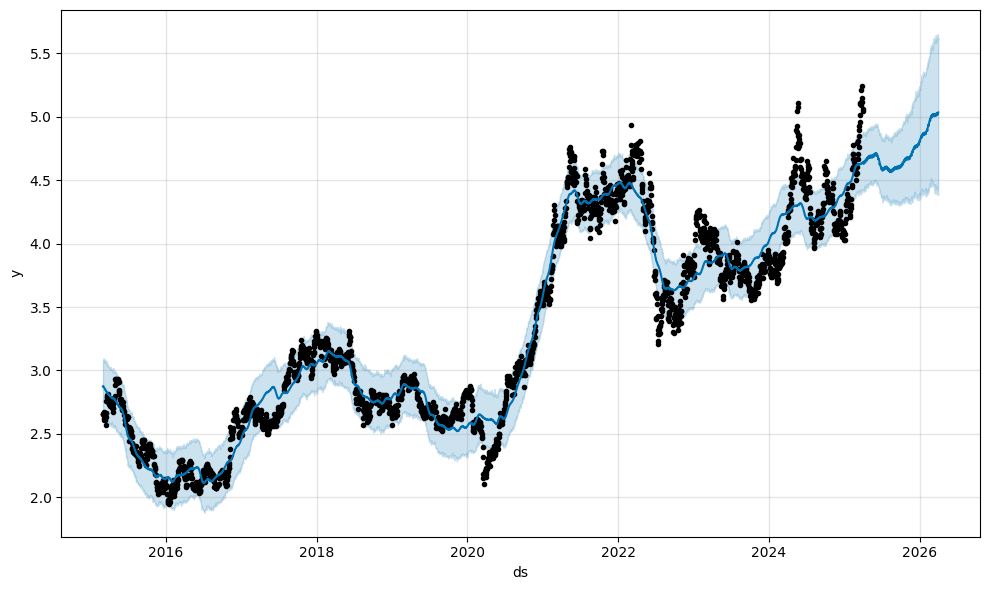

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 준비
data = pd.read_csv('/content/구리 선물 과거 데이터.csv')
data['날짜'] = pd.to_datetime(data['날짜'])
data = data.rename(columns={'날짜': 'ds', '종가': 'y'})  # Prophet은 ds와 y라는 컬럼명을 사용

# Prophet 모델 설정 및 학습
model = Prophet(daily_seasonality=True)
model.fit(data)

# 예측할 기간 설정 (예: 365일 후 예측)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# 예측 결과 시각화
model.plot(forecast)
plt.show()

In [ ]:
# 예측된 데이터 프레임 값.
# 예측할 기간 설정 (예: 365일 후 예측)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# 예측한 365일치의 결과만 추출
# ds : 날짜
# yhat : 예측값
# yhat_lower : 신뢰구간 하한값
# yhat_upper : 신뢰구간 상한값
predicted_365 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365)

# 데이터 프레임 형태로 출력
predicted_365

,ds,yhat,yhat_lower,yhat_upper
2620,2025-04-02,4.641491,4.424573,4.866343
2621,2025-04-03,4.641156,4.418921,4.857533
2622,2025-04-04,4.644880,4.440514,4.856559
2623,2025-04-05,4.628837,4.408990,4.856184
2624,2025-04-06,4.643042,4.436751,4.864019
...,...,...,...,...
2980,2026-03-28,5.014512,4.418232,5.725044
2981,2026-03-29,5.028461,4.479507,5.730566
2982,2026-03-30,5.031682,4.449132,5.684273
2983,2026-03-31,5.030612,4.447318,5.706598


Prophet 모델 개요 <br>
Prophet은 Facebook에서 개발한 시계열 예측 모델입니다. 2017년에 발표되었으며, 주로 비즈니스와 산업 데이터를 기반으로 하는 비정기적인 시계열 예측에 유용합니다. 특히, 계절성, 휴일 효과, 그리고 추세 변화를 모델링하는 데 뛰어난 성능을 보입니다.

1.언제 만들어졌는가? <br>
Prophet은 Facebook의 연구팀이 개발한 오픈 소스 시계열 예측 모델입니다.

2017년에 발표되었으며, 당시 데이터 과학자들이 기존의 시계열 예측 모델(예: ARIMA, ETS 등)으로 해결하기 어려운 문제를 해결하기 위해 만들어졌습니다.

특히, 대규모 비즈니스 데이터에서 시계열 예측을 자동화하고 쉽게 활용할 수 있도록 하는 데 초점을 맞췄습니다.

2.어떻게 사용되는가? <br>
Prophet은 Python과 R에서 사용할 수 있는 패키지로 제공됩니다. 이를 사용하면 시계열 데이터를 빠르고 쉽게 예측할 수 있습니다.

<br> 주요 특징:

추세(trend): 데이터의 일반적인 상승 또는 하강 경향을 모델링합니다.

계절성(seasonality): 특정 시간대, 예를 들어, 일별, 주별, 연도별 주기의 반복적인 패턴을 캡처합니다.

휴일(holidays): 특정 날짜(예: 크리스마스, 명절)와 같은 특별한 이벤트가 데이터에 미치는 영향을 모델링합니다.

Prophet은 자동으로 여러 패턴을 탐지하고 예측할 수 있으며, 사용자가 손쉽게 예측을 진행할 수 있게 돕습니다. 이는 다음과 같은 방법으로 사용됩니다:

데이터 입력: 날짜(ds)와 값(y)이 포함된 데이터프레임을 입력합니다.

모델 학습: Prophet()을 사용하여 모델을 생성하고, fit()을 통해 데이터를 학습시킵니다.

미래 예측: make_future_dataframe()을 사용하여 예측할 기간을 설정하고, predict()로 예측값을 계산합니다.

3.어떻게 쓰이는가? <br>
Prophet은 다음과 같은 분야에서 광범위하게 사용됩니다:

비즈니스 분석: 판매량 예측, 트래픽 예측, 수요 예측 등

금융 분야: 주식 가격, 환율 예측

기후 분석: 기온, 강수량 등의 시계열 예측

웹 트래픽 예측: 웹사이트 방문자 수 예측

4.언제 유용한가? <br>
Prophet은 특정 시계열 데이터를 예측할 때 매우 유용합니다. 특히 다음과 같은 경우에 강력한 성능을 보입니다:

계절성이 뚜렷한 데이터: 예를 들어, 연도별, 월별, 주별로 반복되는 패턴이 있는 데이터에 적합합니다. 예를 들어, 판매량이 연말에 급증하는 경우나 특정 시즌에 소비가 증가하는 패턴을 잘 예측합니다.

휴일 효과를 고려한 예측: 특정 날짜(예: 명절, 공휴일)나 이벤트가 데이터에 영향을 미치는 경우, Prophet은 휴일 효과를 모델링할 수 있습니다.

추세가 불규칙하거나 변동성이 큰 경우: 예를 들어, 특정 기간 동안 빠르게 상승하거나 하락하는 패턴을 추적해야 하는 경우 유용합니다. Prophet은 데이터의 변화하는 추세를 잘 반영할 수 있습니다.

간단한 조정으로 빠르게 예측을 원하는 경우: ARIMA와 같은 복잡한 모델링을 사용하지 않고도, Prophet은 몇 가지 간단한 설정만으로 예측을 생성할 수 있습니다. 이는 복잡한 파라미터 조정 없이 예측을 빠르게 원하는 경우 유용합니다.

5.왜 유용한가? <br>
Prophet은 사용자 친화적이고 자동화된 시계열 예측을 제공합니다. 구체적으로 유용한 점은:

다양한 계절성과 휴일을 반영할 수 있어, 실제 비즈니스 및 경제 데이터를 정확하게 예측하는 데 강력합니다.

유연성이 뛰어나, 사용자가 추세나 계절성 모델링을 조정할 수 있어 특정 데이터 특성에 맞게 모델을 맞춤 설정할 수 있습니다.

쉬운 사용법: R과 Python에서 모두 쉽게 사용 가능하며, 시계열 예측에 필요한 복잡한 수학적 모델링을 거의 신경 쓸 필요 없이 사용할 수 있습니다.

6.Prophet의 한계 <br>
짧은 시계열 데이터에는 적합하지 않을 수 있습니다. 데이터가 충분히 많고 패턴이 뚜렷할 때 효과적입니다.

매우 복잡한 비선형 관계나 긴 시간 범위 예측에서 제한이 있을 수 있습니다.

외부 요인의 복잡한 상호작용을 모델링하는 데는 한계가 있을 수 있습니다.

결론 <br>
Prophet은 빠르고 쉽게 시계열 예측을 진행할 수 있는 강력한 도구입니다. 특히 비즈니스 데이터나 시즌성, 추세가 중요한 데이터에서 유용하게 사용될 수 있습니다. 데이터 과학에서 복잡한 모델링 없이 시계열 예측을 해야 하는 경우 매우 유리합니다.






